<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/13_Explaining_and_Interpreting_Graph_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Working with the email-Eu-core-temporal Dataset

This tutorial demonstrates two methods to load the dataset:

## Automated Download and Extraction

**Steps:**
- Mount Google Drive.
- Create or navigate to a "Data" subfolder under "Colab Notebooks".
- Download the `.gz` file using `curl`.
- Extract the file using `gunzip`.
- Verify the extracted file.
- Load the dataset.

**Dataset Details:**
- **Link:** [https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz](https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz)
- **Description:** Email communication data from a European research institution.
- **Statistics (email-Eu-core-temporal):**
  - Nodes: 986
  - Temporal Edges: 332334
  - Static Graph Edges: 24929
  - Time span: 803 days

---

## Manual Upload Instructions

**Steps:**
- Download the `.gz` file from the repository to your local machine.
- Extract it locally (e.g., right-click and unzip or use `gunzip` on macOS/Linux).
- Create or navigate to a "Data" subfolder under "Colab Notebooks".
- Upload the extracted file(s) into that "Data" subfolder.
- Open or create a Colab notebook.
- Mount Google Drive and change directory to the "Colab Notebooks" folder.
- Load and verify the dataset.


In [7]:
# Automated Download and Extraction

from google.colab import drive
drive.mount('/content/drive')

# Navigate to the Data folder under Colab Notebooks (adjust the path if needed)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

# Download the dataset (.gz file)
!curl -O https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz

# Extract the downloaded .gz file
!gunzip email-Eu-core-temporal.txt.gz

# Verify the extracted file
!ls -l

# Load the dataset
import pandas as pd
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1643k  100 1643k    0     0  2134k      0 --:--:-- --:--:-- --:--:-- 2135k
total 236670
-rw------- 1 root root   114992 Feb  7 12:50 as20000102.txt
-rw------- 1 root root  1431846 Feb  7 16:06 as-caida20071105.txt
-rw------- 1 root root   447101 Feb  7 16:05 as-caida20071105.txt.gz
-rw------- 1 root root  5284478 Feb  7 09:36 ca-AstroPh.txt
-rw------- 1 root root  6704722 Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root  5576851 Feb  7 09:02 cit-HepTh.txt
-rw------- 1 root root  1150439 Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root 12585884 Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root  1074676 Jan 16 18:57 com-lj.top5000.cmty.txt
-rw----

In [ ]:
# Manual Upload Instructions

from google.colab import drive
drive.mount('/content/drive')

# Change directory to the Data folder in Colab Notebooks (adjust the path as needed)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

# Load the dataset (assumes the file 'email-Eu-core-temporal.txt' has been uploaded)
import pandas as pd
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])
print(df.head())


In [14]:
# Running black

from google.colab import drive

# Install nbqa and black (required each new session)
!pip install nbqa black

# Run nbqa black on all notebooks in the current directory
!nbqa black .


No notebooks found in given path(s)


## Section 1: Techniques for Model Explainability

### Objective:
- Understand methods to reveal how graph ML models make decisions.
- Recognize the importance of techniques such as saliency maps and feature importance.

### Introduction:
- This section provides an overview of explainability in graph ML models.
- Explaining model behavior is critical for validating model decisions and ensuring transparency in complex models.


### Key Concepts:
- **Saliency Maps:** Visual tools that highlight the most influential nodes and edges contributing to a model's decision.
- **Feature Importance:** Metrics that quantify the contribution of individual input features to the overall model prediction.


### Code Examples: Generating a Saliency Map Visualization

Below is an example using the email-Eu-core-temporal dataset. In this example, we compute betweenness centrality as a proxy for saliency, and visualize the graph where node sizes and colors indicate their centrality scores.


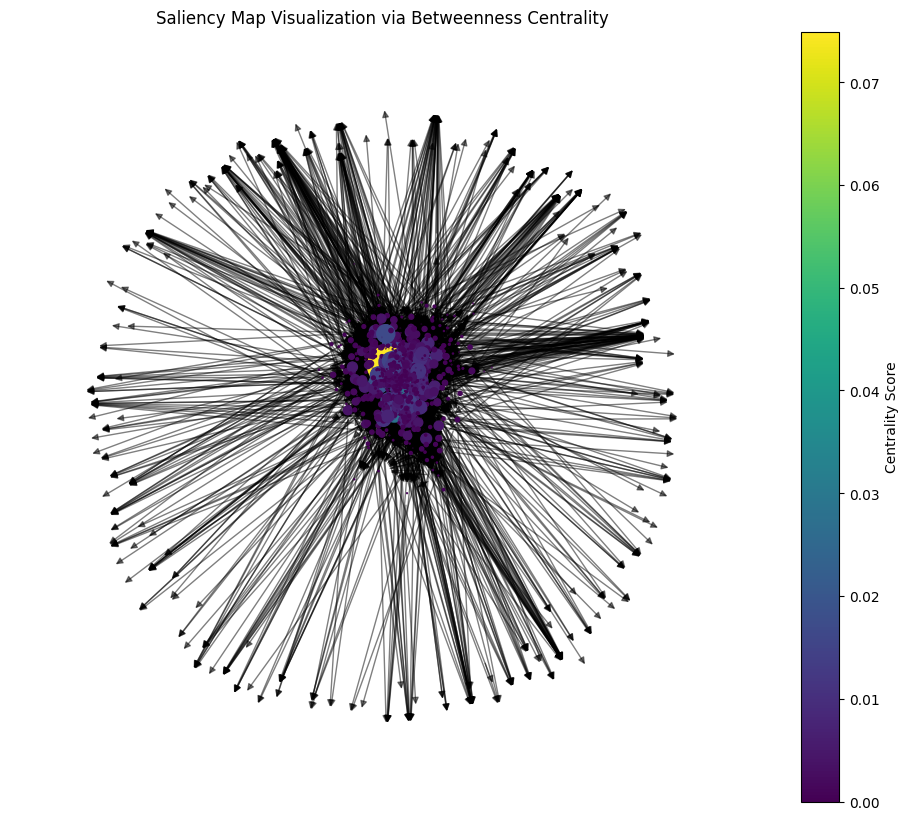

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])

# Create a directed graph from the dataset
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.DiGraph())

# Compute betweenness centrality as a proxy for saliency/feature importance
centrality = nx.betweenness_centrality(G)

# Generate a layout for the graph visualization
pos = nx.spring_layout(G, seed=42)

# Scale node sizes based on centrality scores for visualization
node_sizes = [v * 10000 for v in centrality.values()]

# Plot the graph with node sizes and colors representing centrality
plt.figure(figsize=(12, 10))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=list(centrality.values()), cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Saliency Map Visualization via Betweenness Centrality")
plt.colorbar(nodes, label='Centrality Score')
plt.axis('off')
plt.show()


### Observations & Explanations:
- The visualization uses betweenness centrality to represent the saliency of each node.
- Nodes with larger sizes and warmer colors (as per the colormap) have higher centrality, indicating a greater influence on the network's information flow.
- Such visualizations help in understanding which nodes or features contribute significantly to model decisions.


### Practical Activities:
- **Activity 1:** Modify the code to compute a different centrality metric (e.g., degree centrality or closeness centrality) and compare the resulting saliency map.
- **Activity 2:** Experiment with different layout algorithms (e.g., `nx.circular_layout` or `nx.kamada_kawai_layout`) to see how the graph structure visualization changes.


### Quiz:
1. What is the role of a saliency map in explaining graph ML models?
2. How does feature importance contribute to understanding model behavior?


## Section 2: Visualizing Node Embeddings and Learned Representations

### Objective:
- Grasp the concept of node embeddings in graph analysis.
- Learn techniques to visualize learned representations for deeper insights.

### Introduction:
- Node embeddings convert graph nodes into numerical vectors that capture structural properties.
- Visualization using dimensionality reduction (e.g., t-SNE) helps reveal hidden structures and community patterns in the graph.

### Key Concepts:
- **Dimensionality Reduction:** Techniques like t-SNE reduce high-dimensional embeddings to 2D for visualization.
- **Clustering:** Methods to identify community structures within the graph based on the embeddings.


Computing transition probabilities:   0%|          | 0/986 [00:00<?, ?it/s]

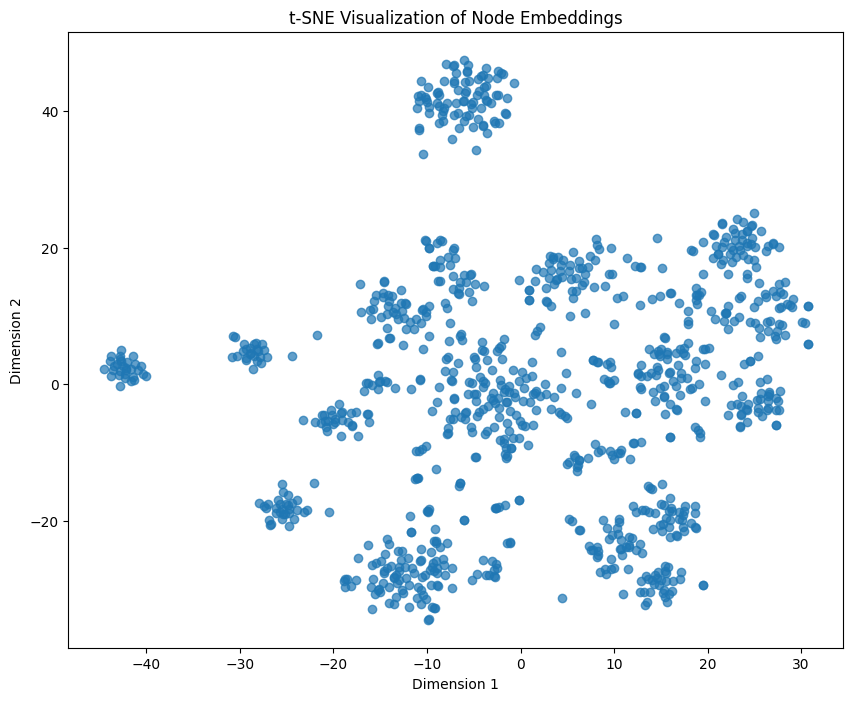

In [11]:
!pip install node2vec

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.manifold import TSNE

# Load the dataset
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])

# Create a directed graph from the dataset (ignoring the temporal aspect)
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.DiGraph())

# Generate node embeddings using Node2Vec with reduced parameters for faster execution
node2vec = Node2Vec(G, dimensions=32, walk_length=10, num_walks=100, workers=2)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

# Retrieve embeddings for all nodes (casting node IDs to string for consistency)
node_ids = list(G.nodes())
embeddings = [model.wv[str(node)] for node in node_ids]
embeddings = np.array(embeddings)  # Convert list to numpy array for t-SNE

# Reduce dimensions to 2D using t-SNE for visualization with adjusted perplexity
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)
plt.title("t-SNE Visualization of Node Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


### Observations & Explanations:
- The scatter plot represents each graph node as a point in a 2D space.
- Clusters in the plot may indicate communities or nodes with similar structural roles.
- Dimensionality reduction via t-SNE effectively reveals patterns in high-dimensional node embeddings.


### Practical Activities:
- **Experimentation:** Modify Node2Vec parameters (e.g., `walk_length`, `num_walks`) and observe how the resulting embeddings change.
- **Visualization Tuning:** Adjust t-SNE parameters such as `perplexity` and `learning_rate` to see how they affect the scatter plot.
- **Clustering Challenge:** Write code to apply a clustering algorithm (e.g., K-Means) on the node embeddings and visualize the clusters on the t-SNE plot.


### Quiz:
1. What is the purpose of using dimensionality reduction for node embeddings?
2. How does clustering enhance the interpretation of learned representations?


## Section 3: Interpreting Predictions: Understanding Model Decisions

### Objective:
- Comprehend the mechanisms behind model predictions.
- Develop skills to interpret why certain nodes or links receive specific labels.


### Introduction:
- In this section, we explore how to interpret the decisions made by graph ML models.
- Understanding the factors that influence predictions is crucial for validating model behavior and improving transparency.

### Key Concepts:
- **Attribution Techniques:** Methods to map model predictions back to input features, helping to reveal which features are most influential.
- **Prediction Comparison:** Analyzing the differences between predicted outcomes and actual ground truth to assess model performance.


### Code Examples: Interpreting Predictions Using a Dummy Node Classification Model

Below is an example where we create a simple node classification task. We compute graph-based features from the email dataset, generate binary labels based on node degree, train a logistic regression model, and then extract feature attributions from the model coefficients. Finally, we compare model predictions with the actual labels.


Feature Attributions (Model Coefficients):
degree: 3.1488
betweenness: 0.0022
clustering: -0.0742


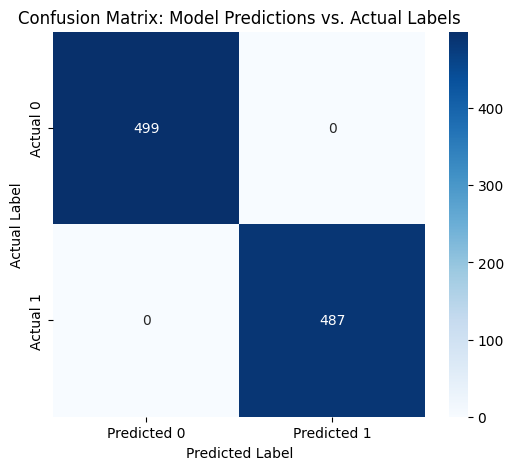


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       487

    accuracy                           1.00       986
   macro avg       1.00      1.00      1.00       986
weighted avg       1.00      1.00      1.00       986



In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])

# Create an undirected graph for simplicity
G = nx.from_pandas_edgelist(df, source='source', target='target')

# Compute graph features for each node
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
clustering_dict = nx.clustering(G)

# Create a DataFrame with the features
nodes = list(G.nodes())
features = pd.DataFrame({
    'node': nodes,
    'degree': [degree_dict[node] for node in nodes],
    'betweenness': [betweenness_dict[node] for node in nodes],
    'clustering': [clustering_dict[node] for node in nodes]
})

# Define a binary target: 1 if node degree is above median, 0 otherwise
median_degree = np.median(features['degree'])
features['high_degree'] = (features['degree'] > median_degree).astype(int)

# Prepare feature matrix X and target vector y
X = features[['degree', 'betweenness', 'clustering']]
y = features['high_degree']

# Train a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)

# Extract feature attributions (coefficients)
coefficients = model.coef_[0]
feature_names = X.columns
attributions = dict(zip(feature_names, coefficients))

# Display feature attributions
print("Feature Attributions (Model Coefficients):")
for feature, coef in attributions.items():
    print(f"{feature}: {coef:.4f}")

# Compare predictions with ground truth using a confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix: Model Predictions vs. Actual Labels")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


### Observations & Explanations:
- **Attribution Analysis:** The logistic regression coefficients indicate the influence of each feature on the prediction. For example, a positive coefficient for "degree" suggests that higher node degrees increase the likelihood of being classified as high degree.
- **Prediction Comparison:** The confusion matrix and classification report provide insights into the model's performance. They help us understand how well the model distinguishes between nodes with high and low degree.
- This approach demonstrates a basic method for interpreting model decisions by mapping predictions back to input features.


### Practical Activities:
- **Activity 1:** Modify the feature set by adding or removing features (e.g., include clustering coefficient only) and observe how the model coefficients and performance metrics change.
- **Activity 2:** Experiment with different threshold definitions for generating binary labels (e.g., using the mean degree instead of the median) and analyze how this affects the model's predictions.
- **Activity 3:** Try implementing another classification algorithm (such as Random Forest) and compare its feature importance scores with the logistic regression coefficients.


### Quiz:
1. Why is it important to interpret model predictions in graph ML?
2. Which techniques can be employed to attribute model decisions to specific features?


## Section 4: Frameworks for Ensuring Transparency in Graph ML Models

### Objective:
- Identify frameworks and tools that promote transparency in model development.
- Understand how to audit and document graph ML models effectively.

### Introduction:
- Transparency in graph ML models is critical for understanding, debugging, and validating model decisions.
- In this section, we explore frameworks that help integrate transparency into the ML workflow through model explanations and audit trails.

### Key Concepts:
- **Transparency Tools:** Libraries such as SHAP and LIME that provide visual and quantitative insights into model behavior.
- **Audit Trails & Documentation:** Methods to log model predictions and feature attributions for later review.


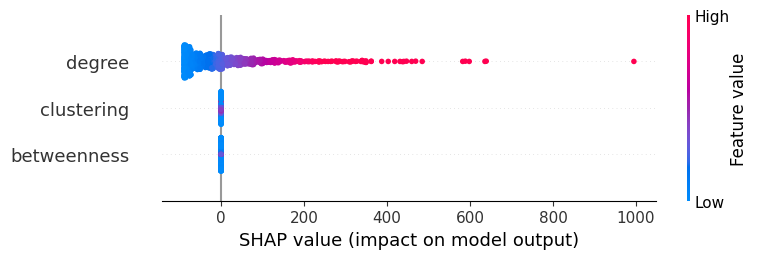

In [16]:
!pip install shap

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])

# Create an undirected graph for simplicity
G = nx.from_pandas_edgelist(df, source='source', target='target')

# Compute graph features for each node
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
clustering_dict = nx.clustering(G)

# Create a DataFrame with the features
nodes = list(G.nodes())
features = pd.DataFrame({
    'degree': [degree_dict[node] for node in nodes],
    'betweenness': [betweenness_dict[node] for node in nodes],
    'clustering': [clustering_dict[node] for node in nodes]
})

# Define a binary target: 1 if node degree is above the median, 0 otherwise
median_degree = np.median(features['degree'])
features['high_degree'] = (features['degree'] > median_degree).astype(int)

# Prepare feature matrix X and target vector y
X = features[['degree', 'betweenness', 'clustering']]
y = features['high_degree']

# Train a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Integrate transparency using SHAP to explain the model
explainer = shap.LinearExplainer(model, X)
shap_values = explainer.shap_values(X)

# Display the SHAP summary plot for a visual audit of feature contributions
shap.summary_plot(shap_values, X)


### Observations & Explanations:
- The SHAP summary plot visualizes the impact of each feature on the model's output across all nodes.
- Each point represents a node, and the color indicates the original feature value (e.g., degree, betweenness, or clustering).
- This visualization serves as an audit tool, providing transparency into which features are driving model predictions.


### Practical Activities:
- **Activity 1:** Experiment with different transparency tools such as LIME. Replace SHAP with LIME to generate local explanations for individual predictions.
- **Activity 2:** Modify the model or feature set and observe how the SHAP summary plot changes, noting differences in feature importance.
- **Activity 3:** Save the SHAP values and summary plot to a file as part of an audit trail for later review.


### Quiz:
1. What are common tools used to ensure transparency in graph ML models?
2. How do audit trails contribute to verifying model performance?


## Section 5: Integrating Explainability into Graph ML Pipelines

### Objective:
- Learn methods to embed explainability directly within graph ML workflows.
- Develop strategies for continuous model monitoring and interpretation.


### Introduction:
- In this section, we integrate explainability functions directly into a complete ML pipeline.
- Automating model interpretation facilitates continuous monitoring and helps maintain transparency as the model evolves.


### Key Concepts:
- **Pipeline Automation:** Integrating data preprocessing, model training, and explainability functions in a streamlined workflow.
- **Continuous Monitoring:** Setting up real-time visualizations and logging to track model performance and feature attributions over time.


### Code Examples: Integrating Explainability into a Pipeline

Below is an example that builds an end-to-end pipeline using scikit-learn. The pipeline includes data scaling, model training, and an integrated explainability component using SHAP to generate a summary plot of feature attributions.


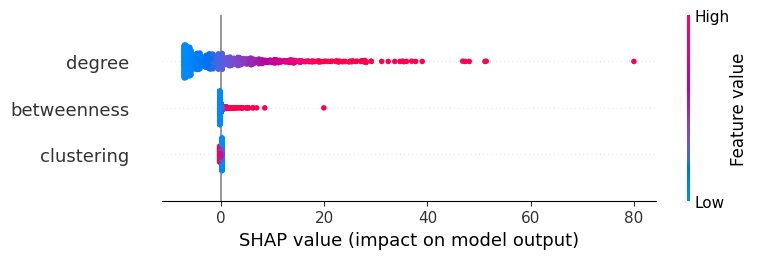

In [17]:
!pip install shap

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import shap

# Load the dataset
df = pd.read_csv('email-Eu-core-temporal.txt', sep=' ', header=None, names=['source', 'target', 'time'])

# Create an undirected graph from the dataset
G = nx.from_pandas_edgelist(df, source='source', target='target')

# Compute graph features for each node
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
clustering_dict = nx.clustering(G)

# Create a DataFrame with the features
nodes = list(G.nodes())
features = pd.DataFrame({
    'degree': [degree_dict[node] for node in nodes],
    'betweenness': [betweenness_dict[node] for node in nodes],
    'clustering': [clustering_dict[node] for node in nodes]
})

# Define a binary target: 1 if node degree is above the median, 0 otherwise
median_degree = np.median(features['degree'])
features['high_degree'] = (features['degree'] > median_degree).astype(int)

# Prepare feature matrix X and target vector y
X = features[['degree', 'betweenness', 'clustering']]
y = features['high_degree']

# Build an end-to-end pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline.fit(X, y)

# Integrate explainability using SHAP
# Transform X using the scaler from the pipeline
X_scaled = pipeline.named_steps['scaler'].transform(X)
explainer = shap.LinearExplainer(pipeline.named_steps['classifier'], X_scaled)
shap_values = explainer.shap_values(X_scaled)

# Generate a SHAP summary plot to visualize feature attributions
shap.summary_plot(shap_values, X, feature_names=X.columns)


### Observations & Explanations:
- The pipeline automates data preprocessing, model training, and explainability, ensuring a consistent workflow.
- The SHAP summary plot provides real-time insights into which features are driving the model's predictions.
- Continuous monitoring using such integrated pipelines can help detect shifts in feature importance and model behavior over time.


### Practical Activities:
- **Activity 1:** Modify the pipeline by adding additional preprocessing steps (e.g., polynomial feature generation) and observe how the SHAP summary plot changes.
- **Activity 2:** Implement a loop to retrain the model periodically with new data, and update the SHAP plot to monitor changes in feature attributions over time.
- **Activity 3:** Experiment with different classifiers within the pipeline (e.g., Random Forest) and compare the resulting explainability outputs.


### Quiz:
1. What advantages does integrating explainability into ML pipelines provide?
2. Describe a method for continuous monitoring of model explanations.


# Quiz answers

## Section 1 Quiz

1. What is the role of a saliency map in explaining graph ML models?  
2. How does feature importance contribute to understanding model behavior?

### Section 1 Quiz Answers

1. A saliency map highlights influential nodes and edges, providing insight into which parts of the input data most affect the model's decisions.  
2. Feature importance quantifies the contribution of each feature to the model's prediction, helping to interpret model behavior.

## Section 2 Quiz

1. What is the purpose of using dimensionality reduction for node embeddings?  
2. How does clustering enhance the interpretation of learned representations?


### Section 2 Quiz Answers

1. Dimensionality reduction simplifies high-dimensional node embeddings into a lower-dimensional space, making visualization and pattern recognition easier.  
2. Clustering groups similar nodes together, helping to uncover underlying community structures and relationships within the graph.


## Section 3 Quiz

1. Why is it important to interpret model predictions in graph ML?  
2. Which techniques can be employed to attribute model decisions to specific features?


### Section 3 Quiz Answers

1. Interpreting model predictions is crucial for understanding, debugging, and trusting the model's decisions, ensuring transparency in complex systems.  
2. Techniques such as attribution methods (e.g., SHAP, LIME) and analyzing model coefficients can be used to map input features to model outputs.


## Section 4 Quiz

1. What are common tools used to ensure transparency in graph ML models?  
2. How do audit trails contribute to verifying model performance?


### Section 4 Quiz Answers

1. Common tools include SHAP, LIME, and built-in model explanation methods that provide visual and quantitative insights into model decisions.  
2. Audit trails document model behavior and predictions over time, enabling verification of performance and facilitating troubleshooting.


## Section 5 Quiz

1. What advantages does integrating explainability into ML pipelines provide?  
2. Describe a method for continuous monitoring of model explanations.


### Section 5 Quiz Answers

1. Integrating explainability into ML pipelines provides continuous insights into model behavior, supports transparency, and facilitates ongoing model improvement.  
2. One method for continuous monitoring is to set up automated dashboards that update SHAP or LIME visualizations in real time as new data is processed.


